In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
import time

In [2]:
#Data

training_data = [
    ['Green', 3],
    ['Green', 3],
    ['Red', 1],
    ['Red', 1],
    ['Yellow', 3],
]
labels = [
    'Apple',
    'Apple',
    'Grape',
    'Grape',
    'Lemon',
]
header = ["color", "diameter"]

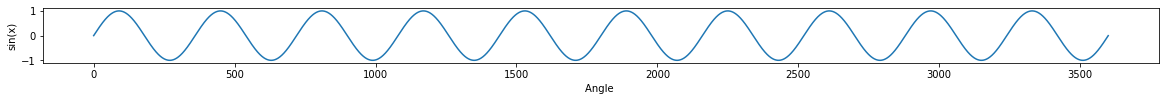

36000


In [21]:
#generate_data for sin

training_data = []
labels = []

for i in range(3600):
    for j in range(10):

        training_data.append([math.sin( (i+j/10)*np.pi/180 ),math.cos( (i+j/10)*np.pi/180 )])
        labels.append(math.sin( (i+j/10)*np.pi/180 ) + math.cos( (i+j/10)*np.pi/180 )   )
#print(training_data)
plt.rcParams["figure.figsize"] = (20,1)    
plt.plot(training_data,labels)

plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    
print(len(training_data))

In [27]:
def prune(data,amount):
    
    X_avg = []
    y_avg = []
        
    for i in range(0,len(data),amount):
    
        avg = 0
        for j in range(amount):
            avg +=data[i+j]
            
        for j in range(amount):
            X_avg.append(i+j)
            y_avg.append(avg/amount)   
            
    return [X_avg,y_avg]

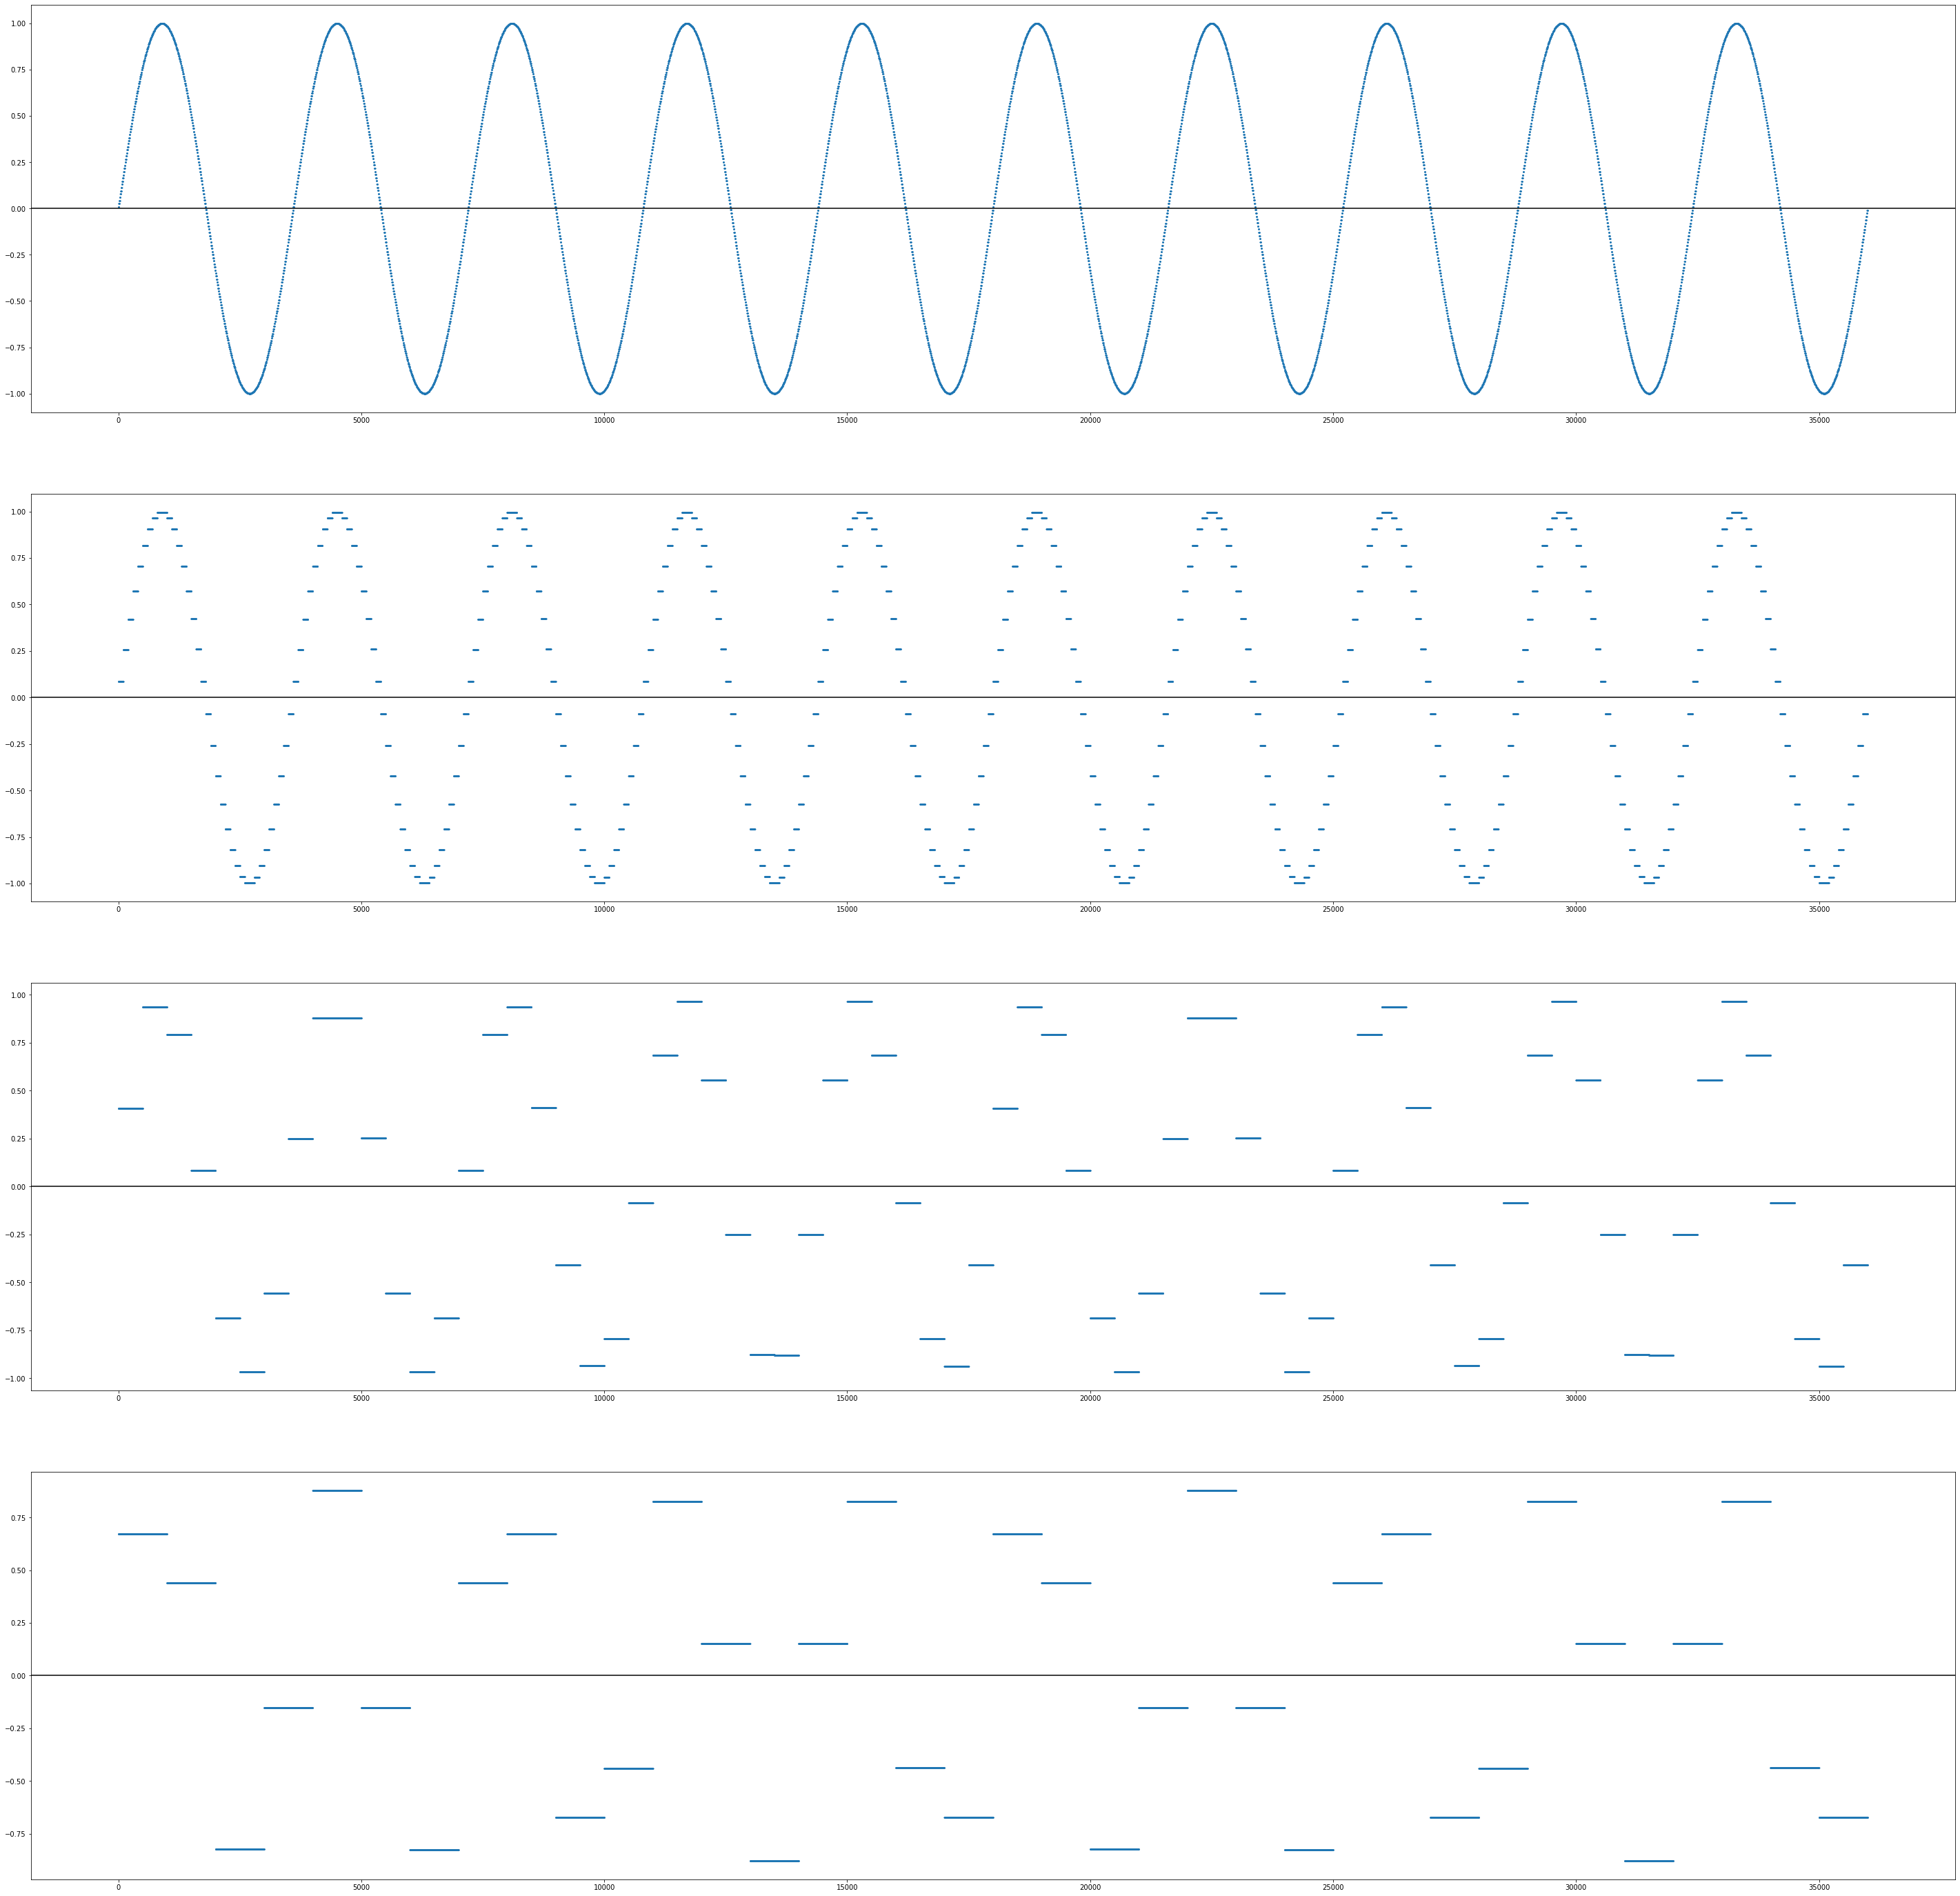

In [39]:
#tobb adathalmazt kigyüjtok majd lefuttatom a dontési fán külön kölön
X_datasets = []
y_datasets = []

result = prune(labels,10)
X_datasets.append(result[0])
y_datasets.append(result[1])

result = prune(labels,100)
X_datasets.append(result[0])
y_datasets.append(result[1])


result = prune(labels,500)
X_datasets.append(result[0])
y_datasets.append(result[1])


result = prune(labels,1000)
X_datasets.append(result[0])
y_datasets.append(result[1])




figure ,axis = plt.subplots(4,1 , figsize=(50, 50))

axis[0].scatter(X_datasets[0],y_datasets[0],s=1)
axis[0].axhline(y=0, color='black', linestyle='-')



axis[1].scatter(X_datasets[1],y_datasets[1],s=1)
axis[1].axhline(y=0, color='black', linestyle='-')


axis[2].scatter(X_datasets[2],y_datasets[2],s=1)
axis[2].axhline(y=0, color='black', linestyle='-')


axis[3].scatter(X_datasets[3],y_datasets[3],s=1)
axis[3].axhline(y=0, color='black', linestyle='-')


plt.show()  

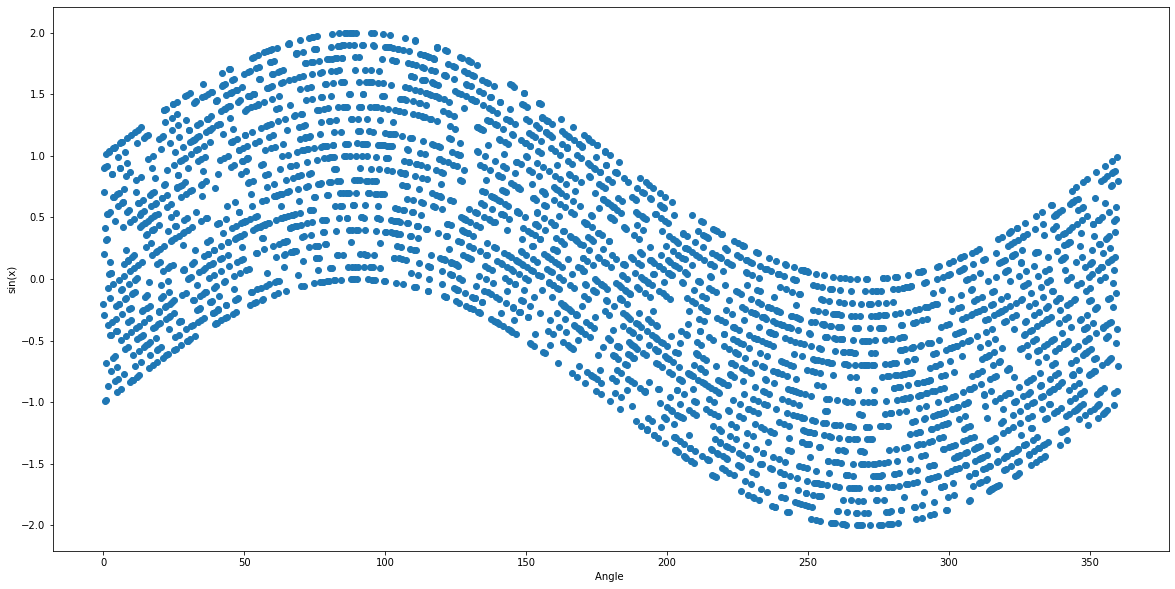

In [112]:
#generate_data + random

training_data = []
labels = []

for i in range(360):
    for j in range(10):

        training_data.append(i+j/10)
        labels.append(math.sin( (i+j/10)*np.pi/180 )+random.randint(-10,10)/10)
#print(training_data)
plt.rcParams["figure.figsize"] = (20,10)    
plt.scatter(training_data,labels)

plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    


#We not only loose data horizontally but also vertically too if we avarage ito out
#But if the values are not changed randomly but by somthing we can describe as a function
#Then we should divied it up seperately
#Another dimensoin of data might impatc the result more or less compared to another one

#Since both varieable affect the result we can not seperate them entirely 
#because we intereseted in the resulte which the two will genereate together
#That is why we have to separate on the same axis maybe multiple time by a different variables so these in those ranges the data
#will corraleta with each other and we cat a more accurate picture.

#In this way we end up regions wich will act like an avarage dataset
#Let's try out this theory on house prices in ohter notebook 



#We not only loose data horizontally but also vertically too
#But if the values are not changed randomly but by somthin we can describe as a function
#The we should divied it up seperately
#Since both varieable affect the result we can not seperate them entirely 
#because we intereseted in the resulte which two will genereate together
#That is why we have to separate on the same axis maybe multiple time by a different variable
#In this way we end up regions wich will act like an avarage dataset
#Let's try out my theory on house prices



#We not only loose data horizontally but also vertically too if we avarage ito out
#But if the values are not changed randomly but by somthing we can describe as a function
#Then we should divied it up seperately
#Another dimensoin of data might impatc the result more or less compared to another one

#Since both varieable affect the result we can not seperate them entirely 
#because we intereseted in the resulte which the two will genereate together
#That is why we have to separate on the same axis maybe multiple time by a different variables so these in those ranges the data
#will corraleta with each other and we cat a more accurate picture.

#In this way we end up regions wich will act like an avarage dataset
#Let's try out this theory on house prices in ohter notebook 


In [42]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0# len(self.nodes)
        self.currentsplit = 0
        self.feature_names = feature_names#coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.child = []
        self.leaf = 0
        

In [43]:
class Node:
    def __init__(self,labels,X_ids,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_names = feature_ids
        self.labels = labels
        self.child = []
        self.ids = X_ids
        self.leaf = 0 #true or false

In [44]:
def get_features(X,labels,column,ids):
    #split the data in column into sets of rows
    #return splited features with their indexes [sub_labels,indexes]
    #get the chosen column in a list
    
    features = [ X[i][column] for i in ids ]#ids tell which row should we use in our calculations
    features_categories = set(features)######!!!!!!!!!
    
    sub_labels = []
    for i in features_categories:
        
        sub_label = [labels[x] for x in range(len(features)) if features[x]==i]#get the labels corresponing to the chosen features
        sub_index = [x for x in range(len(features)) if features[x]==i]
        sub_labels.append([sub_label,sub_index,i])
        
    return sub_labels

In [45]:
def calculate_entropy(data):
    
    
    #print(data)
    categories = set(data)
    entropy = 0;
    
    for i in categories:
        p = data.count(i)/len(data)
        entropy -=  p*math.log(p,2)
        #print(i)
        #print(list(categories).count(i))
    
    return entropy

In [46]:
def calculate_information_gain(X,labels,column,ids):#by data from parent node
    I = 0
    
    sub_labels = get_features(X,labels,column,ids) 
    for i in sub_labels:
        entropy = calculate_entropy(i[0])
        I += entropy * len(i[0])
    
    I = I/len(labels)
    #all_entropy = calculate_entropy(labels)
    

    
    return I

In [47]:
def find_best_split(X,labels,feature_names,ids):
    
    largest_ig = 0
    split = 0
    I = 0 
    
    for i in feature_names:

            I = calculate_information_gain(X,labels,i,ids)
            if(I>largest_ig):
                largest_ig = I
                split = i

    return split

In [48]:
def build_tree(X,feature_names,labels,ids):
    
    split = 0 
    sub_nodes = []
    
    for i in range(len(feature_names)):

        split = find_best_split(X,labels,feature_names,ids)
    
    #split into nodes
    print(feature_names)

    feature_names.pop(split)
    
    node_labels = get_features(X,labels,split,ids)    
        
    for i in node_labels:
        node = Node(i[0],i[1],feature_names)#if it is not leaf call build_tree
        node.split = split
        node.split_result = i[2]

        if(feature_names == [] or calculate_entropy(node.labels) == 0):
            node.leaf = 1

        sub_nodes.append(node)

        
    if(feature_names == []):
        return sub_nodes
    else:
        for node in sub_nodes:
            if(node.leaf == 0):
                node.child = build_tree(X,node.feature_names,node.labels,node.ids)#nem ezek a parameterek kellenek?


    return sub_nodes

    
    

In [54]:
def fit(X,feature_names,labels):
    
    ids = [x for x in range(len(X))]
    feature_ids = [x for x in range(len(feature_names))]
    print(feature_ids)
    tree = Tree(X,feature_names,labels)
    tree.child = build_tree(X,feature_ids,labels,ids)
    return tree

In [55]:
forest = []
for i in range(len(X_datasets)):
    start = time.time()
    tree = fit(X_datasets[i],["Angle"],y_datasets[i])
    print("%d epoch execution time: %f" %(i,start-time.time()))
    forest.append(tree)

[0]


TypeError: 'int' object is not subscriptable

In [104]:
def predict(node,features):
    
    for i in range(len(features)):
        if(node.leaf == 1):
            #print(node.labels)
            return set(node.labels)
        else:
            for j in node.child:
                
                    if(features[j.split] == j.split_result):
                        if(j.leaf == 1):
                            #print(j.labels)
                            return set(j.labels)
                        else:
                            return set(predict(j,features))
            
          

In [110]:
for i in tree.child:
    if(i.leaf == 1):
        print(set(i.labels))
    else:
        for j in i.child:
            print(set(j.labels))
            

{'Grape'}
{'Lemon'}
{'Apple'}


In [109]:
print(predict(tree,['Green', 3]))

{'Apple'}


In [56]:
#plot predicted and actual data

a = [1,2,3,4]

print(a[0][0])



TypeError: 'int' object is not subscriptable